In [66]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema, peak_prominences
import matplotlib.pyplot as plt

In [67]:
experiment_time_ms = 19000

In [68]:
df = pd.read_csv('rawdata/1645703267/gsrLN1.csv', header=None, names=["value"])
df

,value
0,1.2800
1,1.2800
2,1.2800
3,1.2800
4,1.2800
...,...
1728,1.3478
1729,1.3478
1730,1.3413
1731,1.3413


In [69]:
original_count = len(df['value'])
original_count

1733

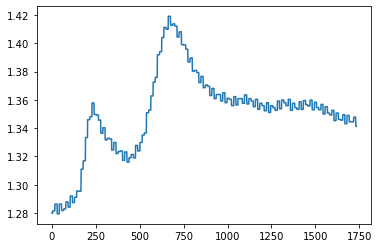

In [70]:
ax = plt.gca()
plt.plot(df.index, df['value'])

In [71]:
# smoothern the data
df['mov_avg'] = df['value'].rolling(300).sum()

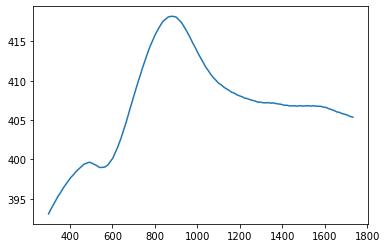

In [72]:
plt.plot(df.index, df['mov_avg'])

In [73]:
# number of points to be checked before and after
n = 80
df['max'] = df.iloc[argrelextrema(df.mov_avg.values, np.greater_equal, order=n)[0]]['mov_avg']

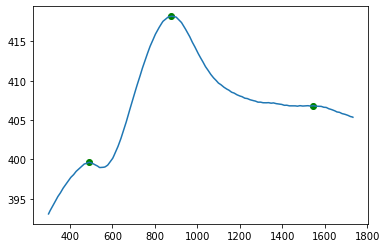

In [74]:
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['mov_avg'])

In [77]:
peak_prominences(df['mov_avg'], df['max'])[0]

TypeError: cannot safely cast `peaks` to dtype('intp')

In [65]:
df = df.dropna()
df

,value,mov_avg,max
491,1.3239,399.6410,399.6410
876,1.3705,418.1910,418.1910
1543,1.3568,406.8274,406.8274
